In [24]:
#os and i/o
import os
import numpy as np
import glob
from os.path import abspath
import csv
import shutil

#scientific computing
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats, optimize
from pandas import DataFrame, Series
import seaborn as sns
import random as rd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats

#ipython add-ons
from IPython.parallel import Client
from IPython.display import Image
import multiprocessing

##nipype
import nibabel as nib
from nipype.pipeline.engine import Node, MapNode, Workflow
from nipype.interfaces.io import DataGrabber, DataFinder, DataSink
from nipype.interfaces import fsl
from nipype.interfaces.fsl import BET
from nipype.interfaces.freesurfer.preprocess import ReconAll
from nipype.interfaces.freesurfer.utils import MakeAverageSubject
from nipype.interfaces.fsl import ExtractROI
from nipype.interfaces.fsl import Merge
from nipype.interfaces.fsl import TOPUP
from nipype.interfaces.fsl import ApplyTOPUP
from nipype.workflows.fmri.fsl import create_susan_smooth

from moss.mosaic import Mosaic

%matplotlib inline

In [25]:
#preliminary housekeeping
home_dir = '/data/home/iballard/fd/'
subj_file = home_dir + 'subjects.txt'
sub_list = list(np.loadtxt(subj_file,'string'))
fix_cmd = '/home/iballard/fix1.06/fix'
os.chdir(home_dir)

In [26]:
in_tuples = []
for sub in sub_list:
    for exp in ['sim_4mm']:
        for run in range(1,4):
            in_tuples.append((sub,exp,str(run)))

In [27]:
#make symbolic links and directory structure that fix expects
for sub in sub_list:
    for exp in ['sim_4mm']:
        for run in ['1','2','3']:

            sub_dir = home_dir + 'analysis/' + exp + '/' + sub + '/preproc/run_' + run + '/'

            if os.path.exists(sub_dir):
                melodic_dir = sub_dir + 'melodic/'
                ica_outputs_dir = melodic_dir + 'filtered_func_data.ica/'
                reg_dir = melodic_dir + 'reg/'
                motion_dir = melodic_dir + 'mc/'

                if not os.path.exists(ica_outputs_dir):
                    os.mkdir(ica_outputs_dir)         

                    #move ica outputs from melodic dir to ica outputs dur
                    cmd_str = 'mv ' + melodic_dir + '* ' + ica_outputs_dir
                    os.system(cmd_str)

                    if not os.path.exists(reg_dir):
                        os.mkdir(reg_dir)
                    if not os.path.exists(motion_dir):
                        os.mkdir(motion_dir)

                    old = sub_dir + 'unsmoothed_timeseries.nii.gz'
                    new = melodic_dir + 'filtered_func_data.nii.gz'
                    cmd_str = 'ln -s ' + old + ' ' + new
                    if not os.path.exists(new):
                        os.system(cmd_str)

                    old = sub_dir + 'functional_mask.nii.gz'
                    new = melodic_dir + 'mask.nii.gz'
                    cmd_str = 'ln -s ' + old + ' ' + new
                    if not os.path.exists(new):
                        os.system(cmd_str)

                    old = sub_dir + 'mean_func.nii.gz'
                    new = melodic_dir + 'mean_func.nii.gz'
                    cmd_str = 'ln -s ' + old + ' ' + new
                    if not os.path.exists(new):
                        os.system(cmd_str)

                    old = sub_dir + 'example_func.nii.gz'
                    new = reg_dir + 'example_func.nii.gz'
                    cmd_str = 'ln -s ' + old + ' ' + new
                    if not os.path.exists(new):
                        os.system(cmd_str)

                    old = sub_dir + 'func2anat_flirt.mat'
                    new = reg_dir + 'highres2example_func.mat'
                    cmd_str = 'convert_xfm -omat ' + new + ' -inverse ' + old
                    if not os.path.exists(new):
                        os.system(cmd_str)

                    old = home_dir + 'analysis/workingdir/antswarp/_subject_id_' + sub + '/convertbrain/brain_out.nii.gz'
                    new = reg_dir + 'highres.nii.gz'
                    cmd_str = 'ln -s ' + old + ' ' + new
                    if not os.path.exists(new):
                        os.system(cmd_str)

                    ##deal with motion data
                    data = pd.DataFrame.from_csv(sub_dir + 'realignment_params.csv')
                    data.to_csv(motion_dir + 'prefiltered_func_data_mcf.par',' ',
                                columns = ['rot_x','rot_y','rot_z','trans_x','trans_y','trans_z'],
                               header = False, index = False)
                else:
                    print exp + ' ' + sub + ' ' + run


sim_4mm fd_104 1
sim_4mm fd_104 2
sim_4mm fd_104 3
sim_4mm fd_105 1
sim_4mm fd_105 2
sim_4mm fd_105 3
sim_4mm fd_107 1
sim_4mm fd_107 2
sim_4mm fd_107 3
sim_4mm fd_108 1
sim_4mm fd_108 2
sim_4mm fd_108 3
sim_4mm fd_109 1
sim_4mm fd_109 2
sim_4mm fd_109 3
sim_4mm fd_110 1
sim_4mm fd_110 2
sim_4mm fd_110 3
sim_4mm fd_112 1
sim_4mm fd_112 2
sim_4mm fd_112 3
sim_4mm fd_113 1
sim_4mm fd_113 2
sim_4mm fd_113 3
sim_4mm fd_114 1
sim_4mm fd_114 2
sim_4mm fd_114 3
sim_4mm fd_115 1
sim_4mm fd_115 2
sim_4mm fd_115 3
sim_4mm fd_117 1
sim_4mm fd_117 2
sim_4mm fd_117 3
sim_4mm fd_118 1
sim_4mm fd_118 2
sim_4mm fd_118 3
sim_4mm fd_119 1
sim_4mm fd_119 2
sim_4mm fd_119 3
sim_4mm fd_122 1
sim_4mm fd_122 2
sim_4mm fd_122 3
sim_4mm fd_123 1
sim_4mm fd_123 2
sim_4mm fd_123 3
sim_4mm fd_124 1
sim_4mm fd_124 2
sim_4mm fd_124 3
sim_4mm fd_126 1
sim_4mm fd_126 2
sim_4mm fd_126 3
sim_4mm fd_127 1
sim_4mm fd_127 2
sim_4mm fd_128 1
sim_4mm fd_128 2
sim_4mm fd_128 3
sim_4mm fd_129 1
sim_4mm fd_129 2
sim_4mm fd_129

In [28]:
def extract_features(in_tuple):
    sub, exp, run = in_tuple
    
    sub_path = home_dir + 'analysis/' + exp + '/' + sub + '/preproc/run_' + run + '/melodic'
    fix_dir = sub_path + '/fix'
    
    if os.path.exists(sub_path) and not os.path.exists(fix_dir):
        cmd_str = fix_cmd + ' -f ' + sub_path
        os.system(cmd_str)


In [57]:
pool = multiprocessing.Pool(processes = 24)
pool.map(extract_features,in_tuples)
pool.terminate()
pool.join()

In [4]:
def classify_features(thresh_tuple):
    sub, exp, run, thresh = thresh_tuple
    sub_path = home_dir + 'analysis/' + exp + '/' + sub + '/preproc/run_' + run + '/melodic'
    training_file = '/home/iballard/fix1.06/training_files/WhII_MB6.RData'
    thresh_file = sub_path + '/fix4melview_WhII_MB6_thr' + thresh + '.txt'
    
    if not os.path.exists(thresh_file):
        cmd_str = fix_cmd + ' -c ' + sub_path + ' ' + training_file + ' ' + thresh
#         print cmd_str
        os.system(cmd_str)

In [5]:
thresholds = ['5','10','15','20','25','30']
thresh_tuple = []
for sub in sub_list:
    for exp in ['sim_4mm']:
        for run in range(1,4):
            for thresh in thresholds:
                thresh_tuple.append((sub,exp,str(run),thresh))

In [6]:
pool = multiprocessing.Pool(processes = 48)
pool.map(classify_features,thresh_tuple)
pool.terminate()
pool.join()

In [7]:
#exame what Fix wants to remove for different thresholds
thresholds = ['5','10','15','20','25','30']
bad_pcs = {} #percentage of bad pcs
pcs_list = {} #actual bad PC list
total_pcs = {} #total # of pcs
conds = ['sim_4mm']
for thresh in thresholds:
    for cond in conds:
        bad_pcs[(cond,thresh)] = []  

for sub in sub_list:
    for exp in conds:
        for run in ['1','2','3']:
                        
            sub_dir = home_dir + 'analysis/' + exp + '/' + sub + '/preproc/run_' + run + '/'

            if os.path.exists(sub_dir):
                for thresh in thresholds:
                    id_tuple = (exp,sub,run,thresh)

                    thresh_file = sub_dir + 'melodic/fix4melview_WhII_MB6_thr' + thresh + '.txt'
                    if os.path.exists(thresh_file):
                        with open(thresh_file) as f:
                            lines = f.readlines()
                            pcs = lines[-1]
                            if pcs.strip('\n') == '[]':
                                pcs_list[id_tuple] = []
                            else:
                                pcs = pcs.strip('[')[:-1].strip(']').strip('\n').split(',')
                                pcs_list[id_tuple] = map(int,pcs)

                            total_pcs[id_tuple] = float(lines[-2].split(',')[0])

                            perc_bad_pcs = [len(pcs_list[id_tuple])/total_pcs[id_tuple]]
                            bad_pcs[(exp,thresh)] = np.hstack([bad_pcs[(exp,thresh)]
                                                      ,perc_bad_pcs])
                    else:
                        print thresh_file
                                  
            else:
                perc_bad_pcs = np.nan
                for thresh in thresholds:
                    bad_pcs[(exp,thresh)] = np.hstack([bad_pcs[(exp,thresh)]
                                              ,perc_bad_pcs])


/home/iballard/.local/lib/python2.7/site-packages/seaborn/categorical.py:1613: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


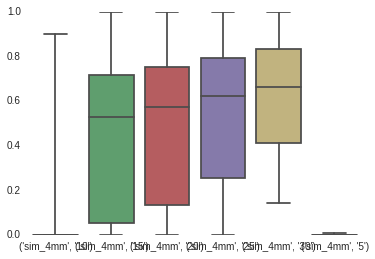

In [8]:
bad_pcs = pd.DataFrame(bad_pcs)
sns.boxplot(bad_pcs)

In [10]:
##compute percentage of total variance
#initialize bad pc dictionary
bad_pc_total_variance = {}
for thresh in thresholds:
    for cond in conds:
        bad_pc_total_variance[(cond,thresh)] = []  

run_id = []

# good_subs = [s for s in sub_list if s not in ['fd_126','fd_140']]
for sub in sub_list:
    for run in ['1','2','3']:
        for exp in ['sim_4mm']:
            sub_dir = home_dir + 'analysis/' + exp + '/' + sub + '/preproc/run_' + run + '/'

            if os.path.exists(sub_dir):
                id_tuple = (exp,sub,run,thresh)
                #get list of how much variance is explained by each ic from the report file
                ic_variance = []
                for ic in range(1,int(total_pcs[id_tuple]) + 1):
                    ic_file = sub_dir + 'melodic/filtered_func_data.ica/report/IC_' + str(ic) + '.html'
                    if os.path.exists(ic_file):
                        with open(ic_file) as f:
                            html_str = f.readlines()
                            html_str = ','.join(html_str)
                            index = html_str.find('% of total variance') #can also look at explained variance
                            ic_variance.append(float(html_str[index - 5:index-1]))
                    else:
                        print ic_file

                #compute total variance explained by bad ics for each threshold level
                for thresh in thresholds:
                    id_tuple = (exp,sub,run,thresh)

                    indices = [i - 1 for i in pcs_list[id_tuple]] #convert to indices (indexing starts at 1 here)
                    bad_ic_variance = [ic_variance[i] for i in indices]
                    bad_ic_variance = np.sum(bad_ic_variance) 
                    bad_pc_total_variance[(exp,thresh)] = np.hstack([bad_pc_total_variance[(exp,thresh)]
                                                                     ,bad_ic_variance])
            else:
                bad_ic_variance = np.nan
                for thresh in thresholds:
                    bad_pc_total_variance[(exp,thresh)] = np.hstack([bad_pc_total_variance[(exp,thresh)]
                                                                     ,bad_ic_variance])
        run_id.append((sub,run))   


/home/iballard/.local/lib/python2.7/site-packages/seaborn/categorical.py:1613: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


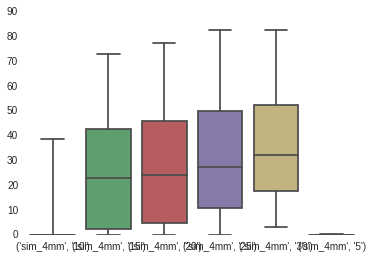

In [11]:
bad_pc_total_variance = pd.DataFrame(bad_pc_total_variance)
sns.boxplot(bad_pc_total_variance)

In [92]:
outlier_thresh = bad_pc_total_variance.mean() + 2.5* bad_pc_total_variance.std()
# iqr = bad_pc_total_variance.quantile(.75) - bad_pc_total_variance.quantile(.25)
# outlier_thresh =  bad_pc_total_variance.quantile(.75) + 3 *iqr
for exp in ['ser_4mm']:
    for thresh in thresholds:
        if thresh == '20':
            data = bad_pc_total_variance[exp][thresh].values
            thresh = outlier_thresh[exp][thresh]
            suspect_indices = data > thresh 
            bad_runs = [x for n,x in enumerate(run_id) if suspect_indices[n]]
            print exp + str(bad_runs)

ser_4mm[('fd_112', '1'), ('fd_147', '3')]


In [98]:
bad_pc_total_variance.mean()

ser_4mm  10     1.983371
         15    17.612472
         20    19.965169
         25    24.081124
         30    28.582697
         5      0.000000
dtype: float64

In [8]:
##project out the bad components
def clean_data(in_tuple):
    threshold = '15'
    sub, exp, run = in_tuple

    sub_path = home_dir + 'analysis/' + exp + '/' + sub + '/preproc/run_' + run + '/'

    mel_path = sub_path + '/melodic'

    thresh_file = mel_path +'/fix4melview_WhII_MB6_thr' + threshold + '.txt'
    cmd_str = fix_cmd + ' -a ' + thresh_file 
    new_file = mel_path + '/filtered_func_data_clean.nii.gz'
    if os.path.exists(sub_path) and not os.path.exists(new_file):
#         os.system(cmd_str)
        print cmd_str


In [9]:
pool = multiprocessing.Pool(processes = 10)
pool.map(clean_data,in_tuples)
pool.terminate()
pool.join()

In [32]:
def smooth_cleaned_data(in_tuple):
    sub, exp, run = in_tuple
    
    sub_path = home_dir + 'analysis/' + exp + '/' + sub + '/preproc/run_' + run
    smooth_f = sub_path + '/melodic/filtered_func_data_clean.nii.gz'
    smooth_dir = 'smoothed' + run + exp + sub
#     out_f = os.path.abspath('smoothed/' + smooth_dir) + '/_smooth0/filtered_func_data_clean_smooth.nii.gz'
    out_f =  home_dir + 'analysis/' + exp + '/' + sub + '/reg/epi/smoothed/run_' + run
    if os.path.exists(smooth_f) :#and not os.path.exists(out_f): #if not already run
        #set up workflow
        wf = Workflow(name = 'smooth')
        wf.basedir = os.path.abspath('fd')

        susan = create_susan_smooth()
        susan.inputs.inputnode.fwhm = 4
        susan.inputs.inputnode.in_files = smooth_f
        susan.inputs.inputnode.mask_file = sub_path + '/functional_mask.nii.gz'

        ##set up Data Sink
        sinker = Node(DataSink(), name = 'sinker')
        sinker.inputs.base_directory = abspath('smoothed')
        wf.connect(susan,'outputnode.smoothed_files',sinker,smooth_dir)
#         print in_tuple
        wf.run()
    else:
        None#print smooth_f
# in_tuples = [('fd_104','ser_4mm','3')]


In [31]:
# pool = multiprocessing.Pool(processes = 12)
# pool.map(smooth_cleaned_data,in_tuples)
# pool.terminate()
# pool.join()
# #use more than you think you need, because each WF requests multiple processes

In [23]:
#rearrange directory structure to trick lyman into thinking cleaned data is its own
for in_tuple in in_tuples:
    sub, exp, run = in_tuple
    
    if sub not in ['fd_104','fd_105']:

        sub_path = home_dir + 'analysis/' + exp + '/' + sub + '/preproc/run_' + run
        smooth_clean = home_dir + '/smoothed/smoothed' + run + exp + sub + '/_smooth0/' + \
            'filtered_func_data_clean_smooth.nii.gz'
        if os.path.exists(sub_path) and os.path.exists(smooth_clean):


            new_dir = sub_path + '/uncleaned_data'
            if not os.path.exists(new_dir):
                os.mkdir(new_dir)

            #move old lyman files inside new_dir if they arent there already
            old_smooth = sub_path + '/smoothed_timeseries.nii.gz'
            old_unsmoothed = sub_path + '/unsmoothed_timeseries.nii.gz'
#             if not os.path.exists(new_dir + '/smoothed_timeseries.nii.gz'):
#                 shutil.move(old_smooth,new_dir)
            if not os.path.exists(new_dir + '/unsmoothed_timeseries.nii.gz'):
                shutil.move(old_unsmoothed,new_dir)

            #move cleaned and smoothed data
            if os.path.exists(smooth_clean) and not os.path.exists(old_smooth):
                os.rename(smooth_clean,old_smooth)

            #create a symbolic link to cleaned and unsmoothed data
            if not os.path.exists(old_unsmoothed):
                cmd_str = 'ln -s ' + sub_path + '/melodic/filtered_func_data_clean.nii.gz ' + \
                old_unsmoothed
                os.system(cmd_str)
        else:
            print smooth_clean

/data/home/iballard/fd//smoothed/smoothed3sim_4mmfd_127/_smooth0/filtered_func_data_clean_smooth.nii.gz
/data/home/iballard/fd//smoothed/smoothed3sim_4mmfd_133/_smooth0/filtered_func_data_clean_smooth.nii.gz


In [182]:
##create an archive of lyman directories
for in_tuple in in_tuples:
    sub = in_tuple[0]
    exp = in_tuple[1]
    run = str(in_tuple[2])
    
    sub_path = home_dir + 'analysis/' + exp + '_8mm/' + sub +'/'

    if os.path.exists(sub_path):

        archive_dir = sub_path + 'uncleaned'
        if not os.path.exists(archive_dir):
            os.mkdir(archive_dir)
        
        if os.listdir(archive_dir) == []:
            dir_contents = glob.glob(sub_path + '*')
            dir_contents = [f for f in dir_contents if f.split('/')[-1:][0] not in ['preproc','uncleaned']]

            for f in dir_contents:
                if os.path.exists(f):
                    shutil.move(f,archive_dir)

In [43]:
##make a mean image
def make_mean(in_tuple):
    sub, exp, run = in_tuple

    sub_path = home_dir + 'analysis/' + exp + '/' + sub + '/preproc/run_' + run + '/'
    if os.path.exists(sub_path):
        ts = sub_path + 'unsmoothed_timeseries.nii.gz'
        mean_ts = sub_path + 'mean_clean.nii.gz'
        mask = sub_path + 'functional_mask.nii.gz'
        out_png = sub_path + 'mean_clean.png'
        cmd = ['fslmaths',ts,'-Tmean',mean_ts]
        os.system(' '.join(cmd))
        try:
            cmap = sns.cubehelix_palette(as_cmap=True, reverse=True,
                                         light=1, dark=0)
            m = Mosaic(mean_ts, mean_ts,mask,step=1)
            m.plot_overlay(vmin=0, cmap=cmap, fmt="%d")
            m.savefig(out_png)
            m.close()
        except:
            print in_tuple
make_mean(in_tuples[11])

In [29]:
pool = multiprocessing.Pool(processes = 10)
pool.map(make_mean,in_tuples)
pool.terminate()
pool.join()

('fd_108', 'ser_4mm', '3')
('fd_123', 'ser_4mm', '1')
('fd_118', 'ser_4mm', '3')
('fd_141', 'ser_4mm', '2')


In [40]:
def plot_cope(in_tuple):
    sub, exp, run = in_tuple

    sub_path = home_dir + 'analysis/' + exp + '-PEfb-diff/' + sub + '/model/smoothed/run_' + run + '/'
    if os.path.exists(sub_path):
        cmap = sns.cubehelix_palette(as_cmap=True, reverse=True,
                                 light=1, dark=0)
        ts = sub_path + 'cope1.nii.gz'
        out_png = sub_path + 'cope1.png'
        m = Mosaic(ts,ts,step=1)
        m.plot_overlay(vmin=0, cmap=cmap, fmt="%d")
        m.savefig(out_png)
        m.close()

In [41]:
pool = multiprocessing.Pool(processes = 10)
pool.map(plot_cope,in_tuples)
pool.terminate()
pool.join()